# KNN Implementation

You've been given a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes.

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

Let's grab it and use it!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Fetching the data

Set index_col=0 to use the first column as the index.

In [3]:
df = pd.read_csv("/Users/shreyanshpandey/Downloads/K-NEarest-Neighbor-master/Classified Data",index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## Standard Scaling

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [5]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [6]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [7]:
df_scaled = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_scaled

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


### Train Test Split


In [10]:
from sklearn.model_selection import train_test_split

#labels
y = df['TARGET CLASS']

X_train,X_test,y_train,y_test = train_test_split(df_scaled,y,test_size=0.3,random_state=42)

## Using KNN 

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1) #initially set to 1

knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

## Predictions and Evaluations 

In [12]:
from sklearn.metrics import confusion_matrix,classification_report

In [13]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       142
           1       0.95      0.93      0.94       158

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [14]:
print(confusion_matrix(y_test,y_pred))

[[134   8]
 [ 11 147]]


## How to choose good K-Value 

Let's go ahead and use the elbow method to pick a good K Value:

In [15]:
error_rate = []

#finding mean error for each k in range
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred_i = knn.predict(X_test)
    error_rate.append(np.mean(y_pred_i!=y_test))

Text(0, 0.5, 'Error Rate')

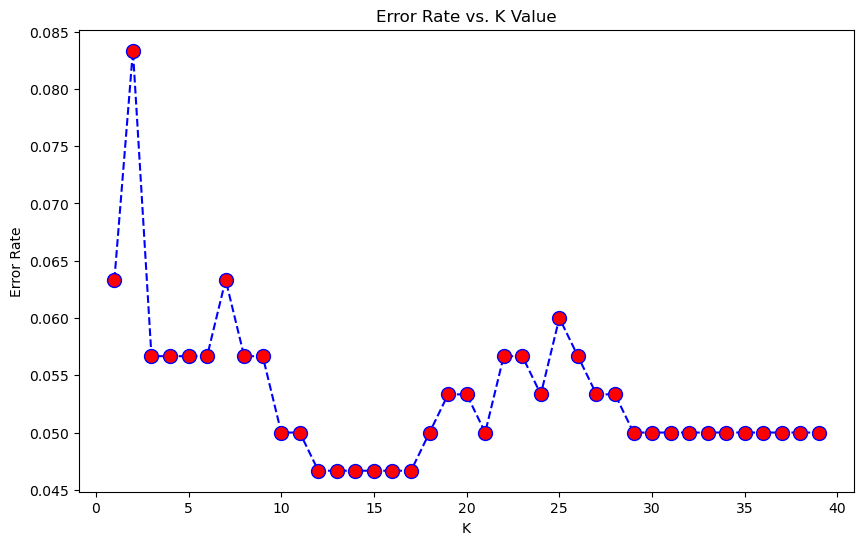

In [16]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after arouns K=15 the error rate just tends to hover around 0.045-0.05 Let's retrain the model with that and check the classification report!

In [18]:
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)


In [19]:
print(confusion_matrix(y_pred,y_test))

[[136   8]
 [  6 150]]


In [20]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       144
           1       0.95      0.96      0.96       156

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

